In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

In [2]:
# Create dataset
n = 500
p = 2

X, Y =make_circles(n_samples=n, factor=0.5, noise=0.05)
Y = Y[:, np.newaxis]

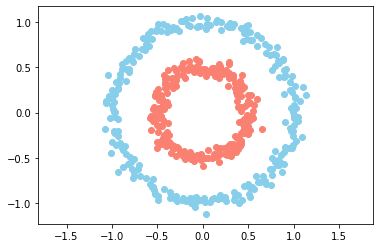

In [3]:
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [4]:
# Estructura de Capa de Red
class NeuralLayer():
  def __init__(self, n_conn, n_neur, act_fun):
    self.act_fun = act_fun
    self.b = np.random.rand(1, n_neur) * 2 -1
    self.w = np.random.rand(n_conn, n_neur) * 2 -1

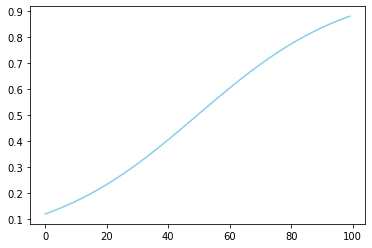

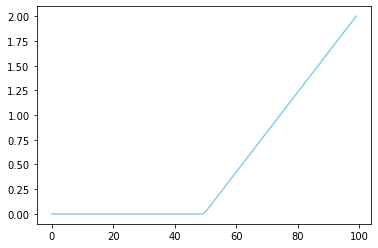

In [5]:
# Funciones de Activacion y de Coste
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))

relu = (lambda x: np.maximum(0, x),
        lambda x: 0 if x <= 0 else 1)

l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

x = np.linspace(-2,2,100)

plt.plot(sigm[0](x), c="skyblue")
plt.show()


plt.plot(relu[0](x), c="skyblue")
plt.show()



In [6]:
def createNN(topology, act_fun):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(NeuralLayer(topology[l], topology[l+1], act_fun))
  
  return nn

def train(nn, x, y, l2_cost, lr=0.05, train = False):
  out = [(None, x)]

  # Forward pass
  for l, layer in enumerate(nn):
    z = out[-1][1] @ nn[l].w + nn[l].b
    a = nn[l].act_fun[0](z)

    out.append((z, a))

  if train:
    # Backward pass
    deltas = []
    
    for l in reversed(range(0, len(nn))):

      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(nn) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * nn[l].act_fun[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * nn[l].act_fun[1](a))

      _W = nn[l].w

      # Gradient descent
      nn[l].b = nn[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      nn[l].w = nn[l].w - out[l][1].T @ deltas[0] * lr
  
  return out[-1][1]


In [7]:

topology = [p, 4, 1]
NN = createNN(topology, sigm)

resolution = 50

In [8]:
loss = []
epoch = 0

Epoch:  3401
Loss:  0.006160222777296074


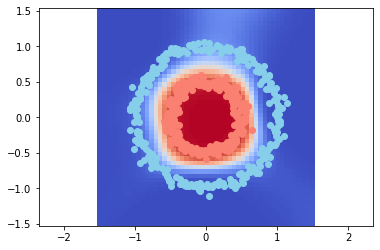

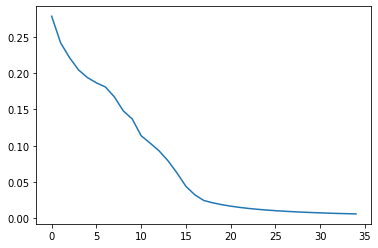

In [11]:
from IPython.display import clear_output

for i in range(500):
  epoch += 1
  pY = train(NN, X, Y, l2_cost,lr=0.03, train=True)

  if(i % 100 == 0):
    loss.append(l2_cost[0](pY, Y))

    _x0 = np.linspace(-1.5, 1.5, resolution)
    _x1 = np.linspace(-1.5, 1.5, resolution)
    _Y = np.zeros((resolution, resolution))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0,i1] = train(NN, np.array([[x0, x1]]), Y, l2_cost, 0.03)[0][0]
  
    clear_output(wait=True)
    print("Epoch: ", epoch)
    print("Loss: ", loss[-1])

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")

    plt.show()

    plt.plot(range(len(loss)), loss)
    plt.show()

